💡 میزان وفاداری پیش‌بینی‌شده: 83.11 از 100


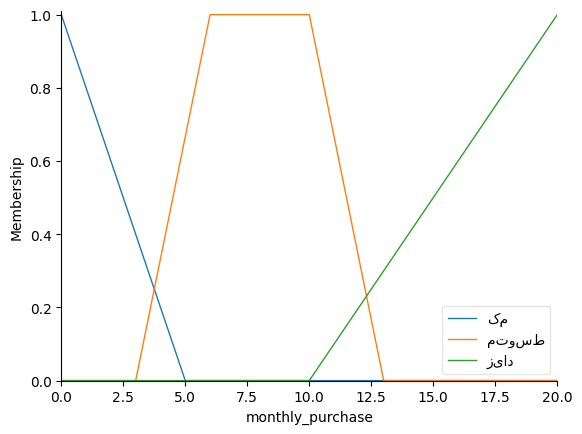

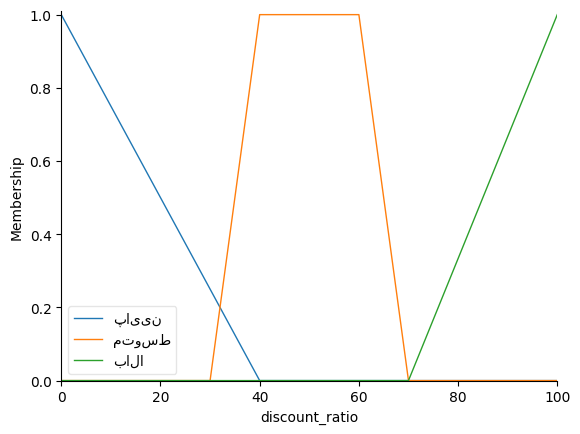

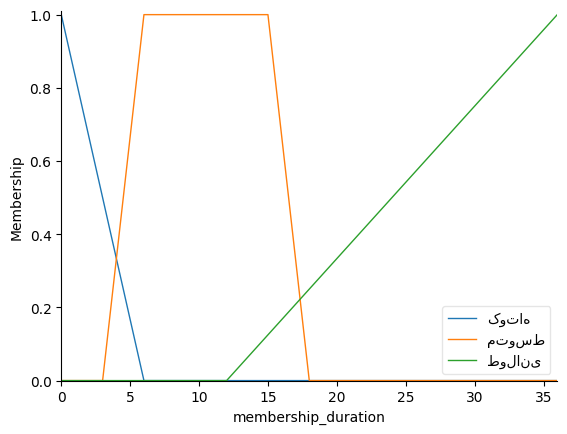

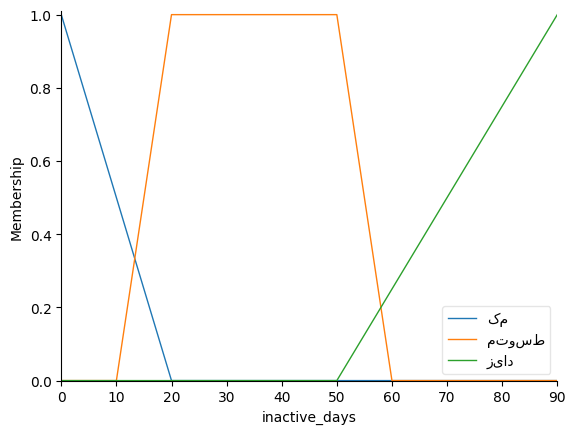

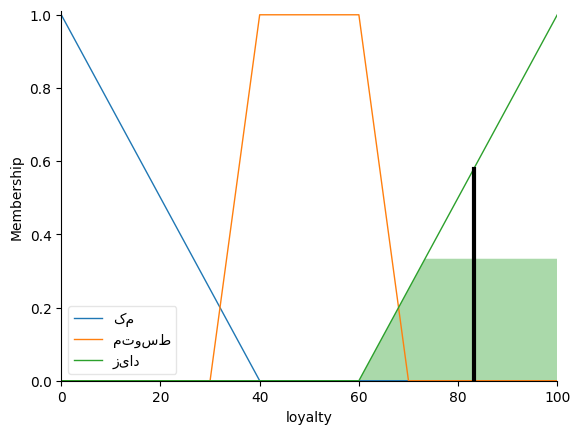

In [8]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# -------------------------------
# تعریف متغیرهای ورودی و خروجی
# -------------------------------

monthly_purchase = ctrl.Antecedent(np.arange(0, 21, 1), 'monthly_purchase')  # میلیون تومان
discount_ratio = ctrl.Antecedent(np.arange(0, 101, 1), 'discount_ratio')      # درصد
membership_duration = ctrl.Antecedent(np.arange(0, 37, 1), 'membership_duration')  # ماه
inactive_days = ctrl.Antecedent(np.arange(0, 91, 1), 'inactive_days')  # روز

loyalty = ctrl.Consequent(np.arange(0, 101, 1), 'loyalty')  # از 0 تا 100

# -------------------------------
# توابع عضویت
# -------------------------------

# خرید ماهانه
monthly_purchase['کم'] = fuzz.trimf(monthly_purchase.universe, [0, 0, 5])
monthly_purchase['متوسط'] = fuzz.trapmf(monthly_purchase.universe, [3, 6, 10, 13])  # ذوزنقه‌ای
monthly_purchase['زیاد'] = fuzz.trimf(monthly_purchase.universe, [10, 20, 20])

# درصد تخفیف
discount_ratio['پایین'] = fuzz.trimf(discount_ratio.universe, [0, 0, 40])
discount_ratio['متوسط'] = fuzz.trapmf(discount_ratio.universe, [30, 40, 60, 70])  # ذوزنقه‌ای
discount_ratio['بالا'] = fuzz.trimf(discount_ratio.universe, [70, 100, 100])

# مدت عضویت
membership_duration['کوتاه'] = fuzz.trimf(membership_duration.universe, [0, 0, 6])
membership_duration['متوسط'] = fuzz.trapmf(membership_duration.universe, [3, 6, 15, 18])  # ذوزنقه‌ای
membership_duration['طولانی'] = fuzz.trimf(membership_duration.universe, [12, 36, 36])

# روزهای غیرفعال
inactive_days['کم'] = fuzz.trimf(inactive_days.universe, [0, 0, 20])
inactive_days['متوسط'] = fuzz.trapmf(inactive_days.universe, [10, 20, 50, 60])  # ذوزنقه‌ای
inactive_days['زیاد'] = fuzz.trimf(inactive_days.universe, [50, 90, 90])

# وفاداری
loyalty['کم'] = fuzz.trimf(loyalty.universe, [0, 0, 40])
loyalty['متوسط'] = fuzz.trapmf(loyalty.universe, [30, 40, 60, 70])  # ذوزنقه‌ای
loyalty['زیاد'] = fuzz.trimf(loyalty.universe, [60, 100, 100])

# -------------------------------
# قوانین فازی (بر اساس جدول)
# -------------------------------

rules = [
    ctrl.Rule(monthly_purchase['زیاد'] & discount_ratio['پایین'] & membership_duration['طولانی'] & inactive_days['کم'], loyalty['زیاد']),
    ctrl.Rule(monthly_purchase['زیاد'] & discount_ratio['پایین'] & membership_duration['متوسط'] & inactive_days['کم'], loyalty['زیاد']),
    ctrl.Rule(monthly_purchase['زیاد'] & discount_ratio['پایین'] & membership_duration['طولانی'] & inactive_days['متوسط'], loyalty['زیاد']),
    ctrl.Rule(monthly_purchase['زیاد'] & discount_ratio['بالا'] & membership_duration['کوتاه'] & inactive_days['زیاد'], loyalty['کم']),
    ctrl.Rule(monthly_purchase['زیاد'] & discount_ratio['بالا'] & membership_duration['طولانی'] & inactive_days['زیاد'], loyalty['متوسط']),
    ctrl.Rule(monthly_purchase['متوسط'] & discount_ratio['پایین'] & membership_duration['طولانی'] & inactive_days['کم'], loyalty['زیاد']),
    ctrl.Rule(monthly_purchase['متوسط'] & discount_ratio['متوسط'] & membership_duration['متوسط'] & inactive_days['متوسط'], loyalty['متوسط']),
    ctrl.Rule(monthly_purchase['متوسط'] & discount_ratio['بالا'] & membership_duration['کوتاه'] & inactive_days['زیاد'], loyalty['کم']),
    ctrl.Rule(monthly_purchase['متوسط'] & discount_ratio['بالا'] & membership_duration['طولانی'] & inactive_days['کم'], loyalty['متوسط']),
    ctrl.Rule(monthly_purchase['کم'] & discount_ratio['پایین'] & membership_duration['کوتاه'] & inactive_days['کم'], loyalty['متوسط']),
    ctrl.Rule(monthly_purchase['کم'] & discount_ratio['متوسط'] & membership_duration['متوسط'] & inactive_days['زیاد'], loyalty['کم']),
    ctrl.Rule(monthly_purchase['کم'] & discount_ratio['بالا'] & membership_duration['کوتاه'] & inactive_days['زیاد'], loyalty['کم']),
    ctrl.Rule(monthly_purchase['کم'] & discount_ratio['پایین'] & membership_duration['طولانی'] & inactive_days['کم'], loyalty['متوسط']),
    ctrl.Rule(monthly_purchase['متوسط'] & discount_ratio['پایین'] & membership_duration['متوسط'] & inactive_days['متوسط'], loyalty['متوسط']),
    ctrl.Rule(monthly_purchase['زیاد'] & discount_ratio['متوسط'] & membership_duration['متوسط'] & inactive_days['متوسط'], loyalty['زیاد']),
    ctrl.Rule(monthly_purchase['کم'] & discount_ratio['بالا'] & membership_duration['طولانی'] & inactive_days['زیاد'], loyalty['متوسط']),
]

# -------------------------------
# ساخت سیستم فازی و شبیه‌سازی
# -------------------------------

loyalty_ctrl = ctrl.ControlSystem(rules)
loyalty_sim = ctrl.ControlSystemSimulation(loyalty_ctrl)

# -------------------------------
# مقداردهی تستی ورودی‌ها
# -------------------------------

loyalty_sim.input['monthly_purchase'] = 12
loyalty_sim.input['discount_ratio'] = 10
loyalty_sim.input['membership_duration'] = 30
loyalty_sim.input['inactive_days'] = 10

# اجرای سیستم فازی
loyalty_sim.compute()

# خروجی
print(f"💡 میزان وفاداری پیش‌بینی‌شده: {loyalty_sim.output['loyalty']:.2f} از 100")

# نمایش گراف‌ها
monthly_purchase.view()
discount_ratio.view()
membership_duration.view()
inactive_days.view()
loyalty.view(sim=loyalty_sim)
plt.show()
